# Nonlinear Relationships

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [60]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.22.4
1.5.3
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
1.2.2


In [61]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Brief Introduction to Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
X = df[['LSTAT']].values
y = df['MEDV']

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [65]:
tree = DecisionTreeRegressor(max_depth=5)

In [66]:
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [67]:
sort_idx = X.flatten().argsort()

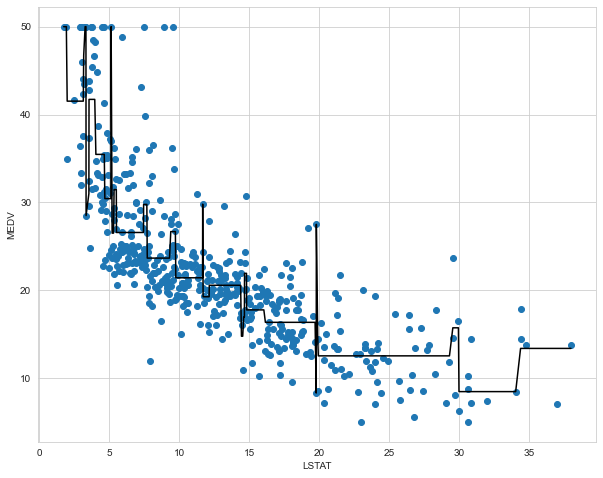

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

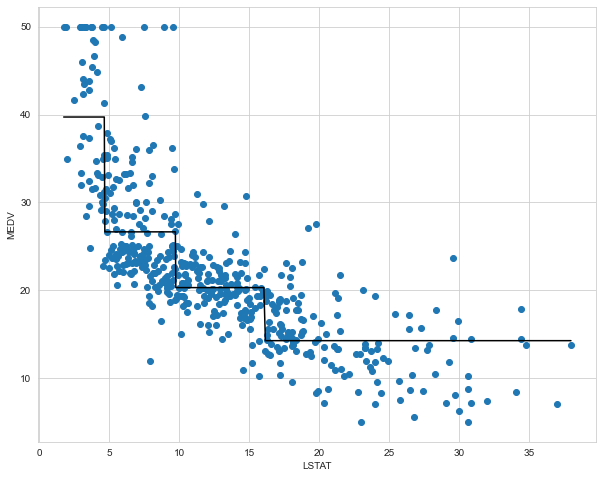

In [69]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
X = df[['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = df['MEDV'].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
forest = RandomForestRegressor(n_estimators=500, criterion='squared_error',
                               random_state=42, n_jobs=-1)

In [101]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [102]:
y_train_pred = forest.predict(X_train)

In [103]:
y_test_pred = forest.predict(X_test)

In [104]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred),
             mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8753, test: 9.3256


In [105]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8748


# Brief Introduction to AdaBoost

In [106]:
from sklearn.ensemble import AdaBoostRegressor

In [107]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                        n_estimators=500, random_state=42)

In [108]:
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [109]:
y_train_pred = ada.predict(X_train)

In [110]:
y_test_pred = ada.predict(X_test)

In [111]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred),
             mean_squared_error(y_test, y_test_pred)))

MSE train: 4.4567, test: 13.2427


In [112]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9493, test: 0.8223


***

# Revisiting Feature Importance

13 features.

Are they all equally important?

Which features are more important?

Can scikit-learn help us with this?

## According to AdaBoost

In [113]:
ada.feature_importances_

array([0.03284169, 0.0017967 , 0.01146074, 0.00209209, 0.03897159,
       0.24219268, 0.01057968, 0.13055771, 0.01554554, 0.02348895,
       0.04072215, 0.02430303, 0.42544745])

In [127]:
df1 = df[['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [128]:
result = pd.DataFrame(ada.feature_importances_, df1.columns)
result.columns = ['feature']

In [129]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.425447
RM,0.242193
DIS,0.130558
PTRATIO,0.040722
NOX,0.038972
CRIM,0.032842
B,0.024303
TAX,0.023489
RAD,0.015546
INDUS,0.011461


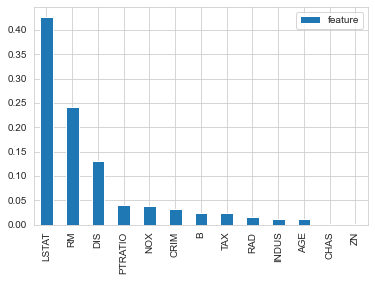

In [130]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

## According to Random Forest

In [131]:
forest.feature_importances_

array([0.03204822, 0.00160483, 0.00700703, 0.00125804, 0.01475089,
       0.40389139, 0.01410918, 0.06287534, 0.00515063, 0.01197446,
       0.01821116, 0.01241787, 0.41470096])

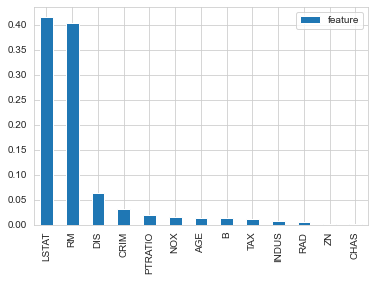

In [133]:
result = pd.DataFrame(forest.feature_importances_, df1.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

# Exercise

Time for you to try your hands on building machine learning model. All the codes have been provided. All you have to do is study the codes and make some light modifications to tacklet the problem that I am presenting to you now.

In previous and this lesson, I performed modelling of our data using Random Forest and AdaBoost. I would like you to make use of Decision Tree Regressor and perform the following:

1. Split your data to train and test set, reserving 30% of your data for testing
2. Instantiate, fit and predict
3. Calculate MSE and R-square
4. Extract feature importance and visualise it using bar chart

Let's try this out

.

.

.

Your turn.

In [134]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [135]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred),
             mean_squared_error(y_test, y_test_pred)))

MSE train: 15.3680, test: 16.9282


In [136]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.8252, test: 0.7728


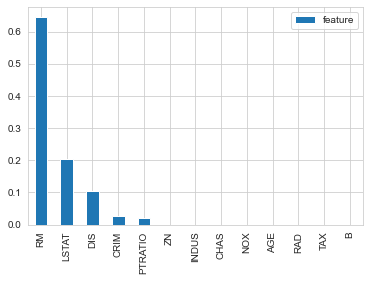

In [138]:
result = pd.DataFrame(tree.feature_importances_, df1.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***